<a href="https://colab.research.google.com/github/Akshitha0403/CodeClause_mask_detection/blob/main/MaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**configuring the path of Kaggle.json file**

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Dataset**

In [6]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:07<00:00, 29.7MB/s]
100% 163M/163M [00:07<00:00, 23.4MB/s]


In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dependencies & Libraries**

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [89]:
# Extracting with mask files from dataset
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3145.jpg', 'with_mask_1287.jpg', 'with_mask_3240.jpg', 'with_mask_3375.jpg', 'with_mask_212.jpg']
['with_mask_2788.jpg', 'with_mask_798.jpg', 'with_mask_3253.jpg', 'with_mask_2497.jpg', 'with_mask_3257.jpg']


In [90]:
# Extracting without mask files from dataset
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_185.jpg', 'without_mask_2309.jpg', 'without_mask_482.jpg', 'without_mask_474.jpg', 'without_mask_953.jpg']
['without_mask_317.jpg', 'without_mask_2433.jpg', 'without_mask_1115.jpg', 'without_mask_1133.jpg', 'without_mask_940.jpg']


In [91]:
#Total number of images.
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask-->1
    without mask-->0

In [13]:
# Creating the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [61]:
print(with_mask_labels[0:5],len(with_mask_labels))
print(without_mask_labels[0:5],len(without_mask_labels))
labels = with_mask_labels + without_mask_labels
print(len(labels))

[1, 1, 1, 1, 1] 3725
[0, 0, 0, 0, 0] 3828
7553


**Displaying the Images**

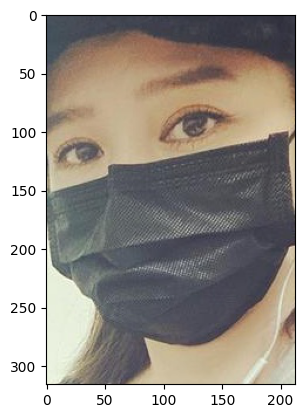

In [80]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_91.jpg')
imgplot = plt.imshow(img)
plt.show()

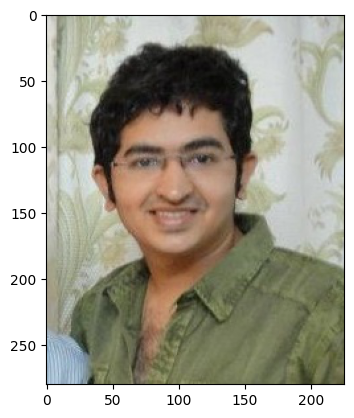

In [84]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_993.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**


1.   Resize the Images
2.   Convert the images to numpy arrays




In [29]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [32]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [33]:
type(data[0])

numpy.ndarray

In [34]:
data[0].shape

(128, 128, 3)

In [35]:
# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [85]:
type(X)

numpy.ndarray

In [86]:
type(Y)

numpy.ndarray

In [87]:
print(X.shape)

(7553, 128, 128, 3)


In [88]:
print(Y.shape)

(7553,)


In [40]:
print(Y)

[1 1 1 ... 0 0 0]


**Splitting the data into Train & Test**

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [43]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [44]:
X_train[0]

array([[[ 42,  33,  18],
        [ 44,  35,  20],
        [ 45,  37,  21],
        ...,
        [241, 244, 251],
        [241, 244, 251],
        [241, 244, 251]],

       [[ 34,  25,  11],
        [ 35,  25,  12],
        [ 36,  27,  13],
        ...,
        [241, 244, 251],
        [241, 244, 251],
        [241, 244, 251]],

       [[ 27,  16,   6],
        [ 28,  17,   7],
        [ 29,  18,   8],
        ...,
        [243, 246, 253],
        [243, 246, 253],
        [242, 245, 252]],

       ...,

       [[228,   1,  22],
        [228,   0,  20],
        [229,   0,  15],
        ...,
        [137,  35,  50],
        [133,  58,  60],
        [126,  67,  62]],

       [[224,   1,  16],
        [225,   0,  15],
        [226,   0,  11],
        ...,
        [176,  38,  70],
        [146,  48,  60],
        [137,  70,  67]],

       [[220,   0,  12],
        [221,   0,  10],
        [224,   0,   9],
        ...,
        [197,  36,  76],
        [156,  45,  62],
        [137,  66,  65]]

In [45]:
X_train_scaled[0]

array([[[0.16470588, 0.12941176, 0.07058824],
        [0.17254902, 0.1372549 , 0.07843137],
        [0.17647059, 0.14509804, 0.08235294],
        ...,
        [0.94509804, 0.95686275, 0.98431373],
        [0.94509804, 0.95686275, 0.98431373],
        [0.94509804, 0.95686275, 0.98431373]],

       [[0.13333333, 0.09803922, 0.04313725],
        [0.1372549 , 0.09803922, 0.04705882],
        [0.14117647, 0.10588235, 0.05098039],
        ...,
        [0.94509804, 0.95686275, 0.98431373],
        [0.94509804, 0.95686275, 0.98431373],
        [0.94509804, 0.95686275, 0.98431373]],

       [[0.10588235, 0.0627451 , 0.02352941],
        [0.10980392, 0.06666667, 0.02745098],
        [0.11372549, 0.07058824, 0.03137255],
        ...,
        [0.95294118, 0.96470588, 0.99215686],
        [0.95294118, 0.96470588, 0.99215686],
        [0.94901961, 0.96078431, 0.98823529]],

       ...,

       [[0.89411765, 0.00392157, 0.08627451],
        [0.89411765, 0.        , 0.07843137],
        [0.89803922, 0

**Building a Convolutional Neural Networks (CNN)**

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [52]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [53]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 160s 933ms/step - loss: 0.1223 - acc: 0.9542 - val_loss: 0.2278 - val_acc: 0.9455
Epoch 2/5
170/170 [==============================] - 163s 959ms/step - loss: 0.0990 - acc: 0.9641 - val_loss: 0.2547 - val_acc: 0.9322
Epoch 3/5
170/170 [==============================] - 159s 934ms/step - loss: 0.0982 - acc: 0.9634 - val_loss: 0.2370 - val_acc: 0.9355
Epoch 4/5
170/170 [==============================] - 151s 890ms/step - loss: 0.0677 - acc: 0.9743 - val_loss: 0.2467 - val_acc: 0.9537
Epoch 5/5
170/170 [==============================] - 150s 880ms/step - loss: 0.0699 - acc: 0.9731 - val_loss: 0.2740 - val_acc: 0.9488


**Model Evaluation**

In [54]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 14s 286ms/step - loss: 0.3080 - acc: 0.9411
Test Accuracy = 0.9410986304283142


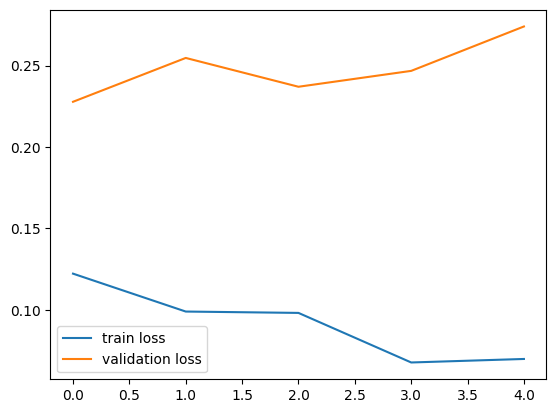

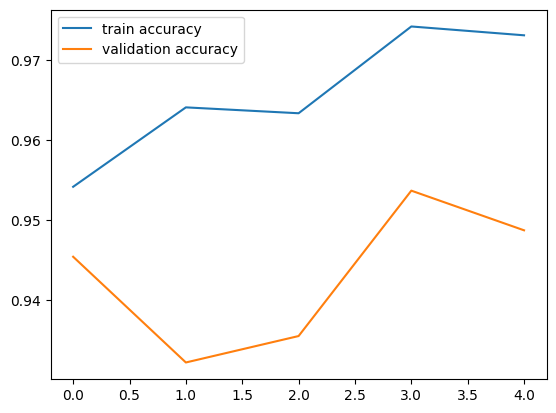

In [55]:
h = history
# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_91.jpg


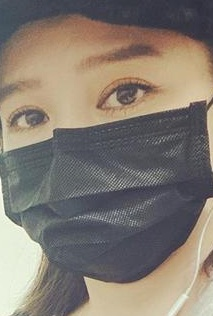

1/1 [==============================] - 0s 35ms/step
The person in the image is wearing a mask


In [99]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
#print(input_prediction)
input_pred_label = np.argmax(input_prediction)
#print(input_pred_label)
if input_pred_label == 1:
   print('The person in the image is not wearing a mask')
else:
   print('The person in the image is wearing a mask')